# Unit 3 -- Volatility Modeling

|        Time | Subject                                                      |
|:------------|--------------------------------------------------------------|
| 08:30-08:45 | Unit 1 -- Welcome and Intro                                  |
| 08:45-09:30 | Unit 2 -- Financial Ecosystem: `quantmod`, `xts`, Plotting   |
| 09:45-10:30 | **Unit 3 -- Volatility Modeling: `rugarch` and `rmgarch`**   |
| 10:45-11:30 | Unit 4 -- Performance and Portfolio Analysis                 |
| 11:45-12:30 | Unit 5 -- Bayesian Modeling: `Stan`                          |


## Characteristics of Financial Time Series

**Volatility Clustering**:
- Occasional large shifts
- Large shifts "co-located" in time

Most commonly used model for this phenomenon: **Generalized Autoregressive Conditional Heteroscedasticity** ("GARCH")

$$\sigma^2_t \approx \alpha r_t^2 + \beta\sigma^2_{t-1}$$

![](https://upload.wikimedia.org/wikipedia/commons/9/94/Helen_of_Troy.jpg)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


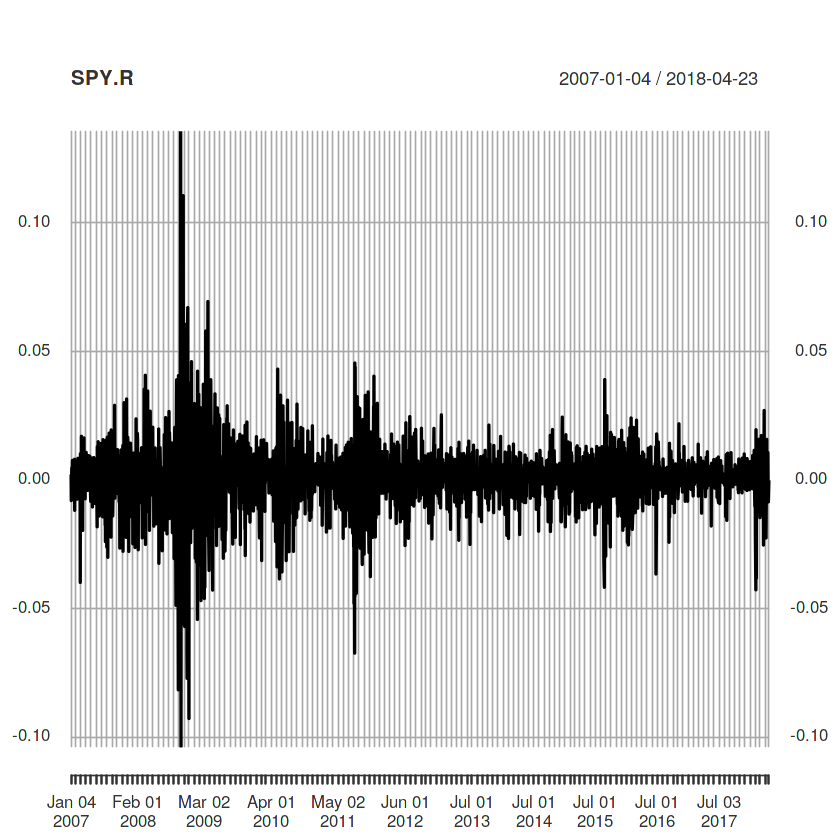

In [1]:
library(quantmod)
SPY <- getSymbols("SPY", auto.assign=FALSE)
SPY.R <- na.omit(ROC(Ad(SPY)))
plot(SPY.R)

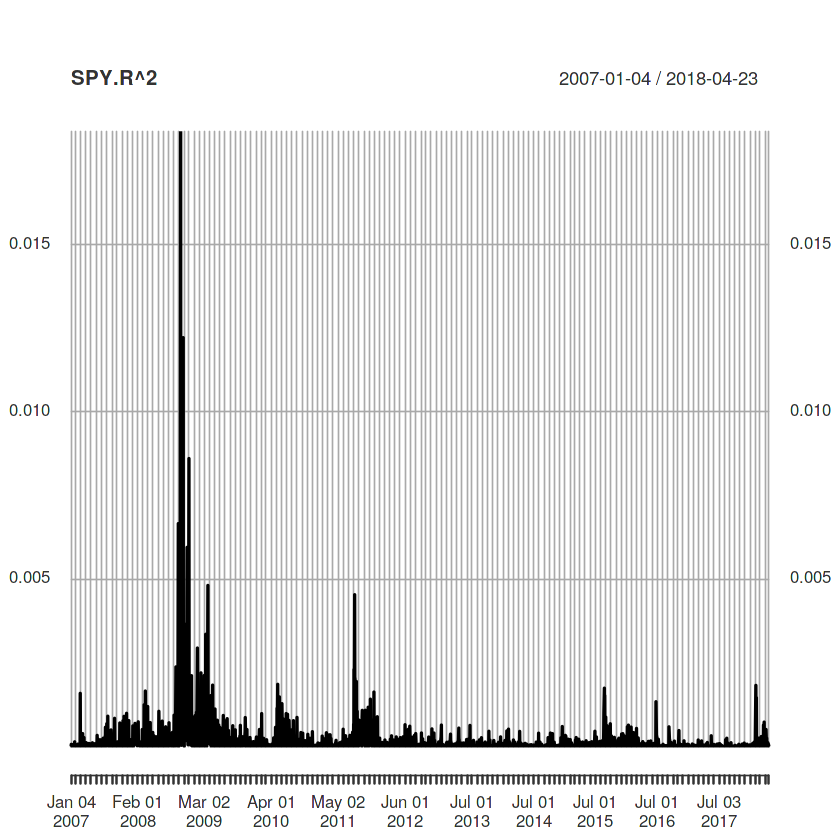

In [2]:
plot(SPY.R^2)

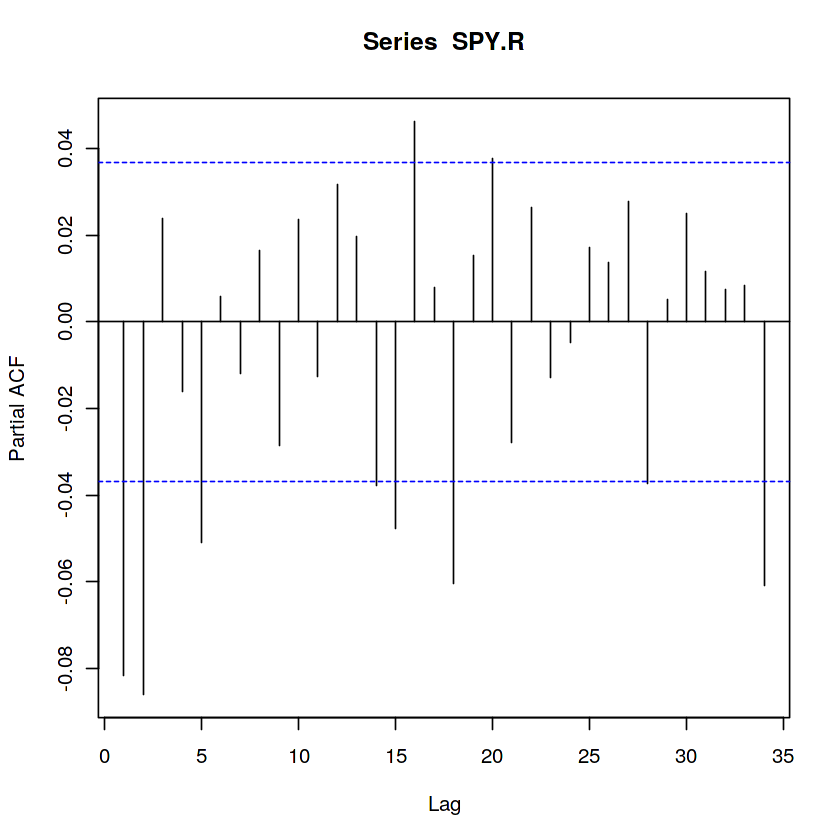

In [3]:
pacf(SPY.R)

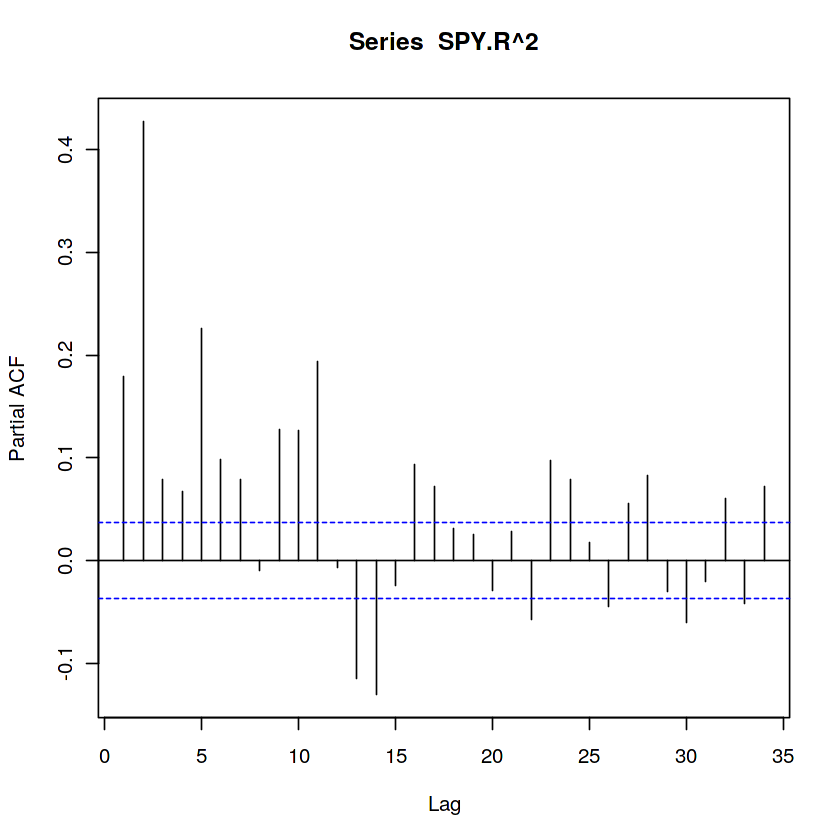

In [4]:
pacf(SPY.R^2)

### `rugarch` package: Univariate GARCH models

Huge range of supported models: 
- <https://cran.r-project.org/web/packages/rugarch/vignettes/Introduction_to_the_rugarch_package.pdf>

Modular approach: 
- specify: `ugarchspec`
- fit: `ugarchfit`
- analyze: `ugarchforecast`, `ugarchsim`, `ugarchroll`, *etc.*

Loading required package: parallel

Attaching package: ‘rugarch’

The following object is masked from ‘package:stats’:

    sigma



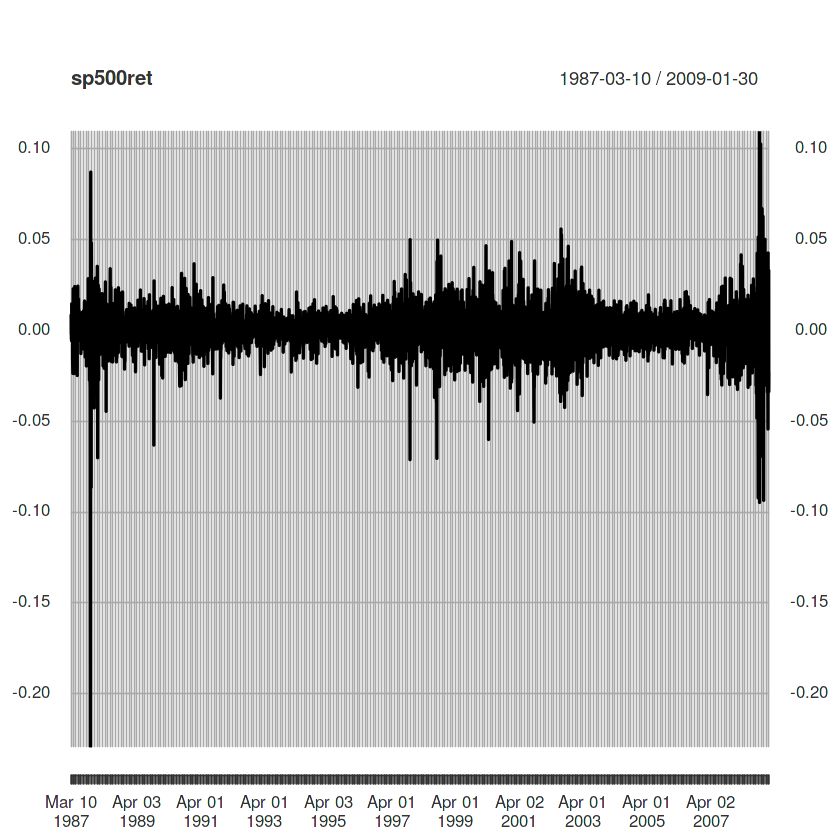

In [5]:
library(xts)
library(rugarch)
data(sp500ret)
sp500ret <- as.xts(sp500ret)
plot(sp500ret)

In [6]:
ugarchspec()


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


In [7]:
spec <- ugarchspec(mean.model=list(armaOrder=c(0, 0), include.mean=FALSE))
fit <- ugarchfit(spec, data=sp500ret)
fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000001    0.000001   1.4045  0.16016
alpha1  0.087260    0.013599   6.4167  0.00000
beta1   0.905044    0.013747  65.8342  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
omega   0.000001    0.000014 0.097459 0.922362
alpha1  0.087260    0.180311 0.483941 0.628428
beta1   0.905044    0.186710 4.847335 0.000001

LogLikelihood : 17883.47 

Information Criteria
------------------------------------
                    
Akaike       -6.4749
Bayes        -6.4713
Shibata      -6.4749
Hannan-Quinn -6.4737

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
           


please wait...calculating quantiles...


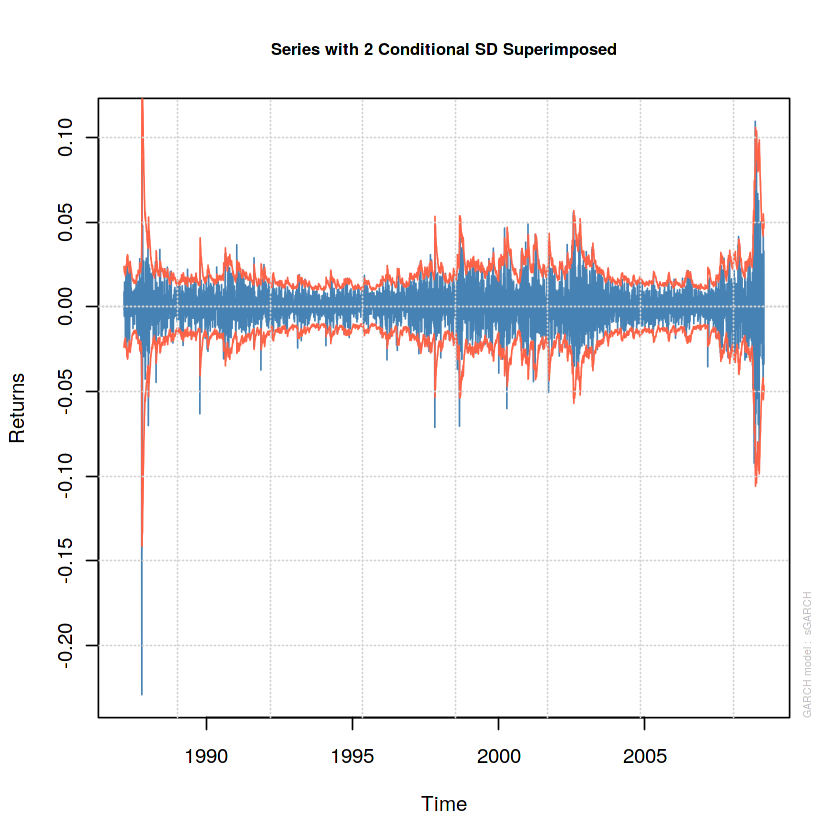

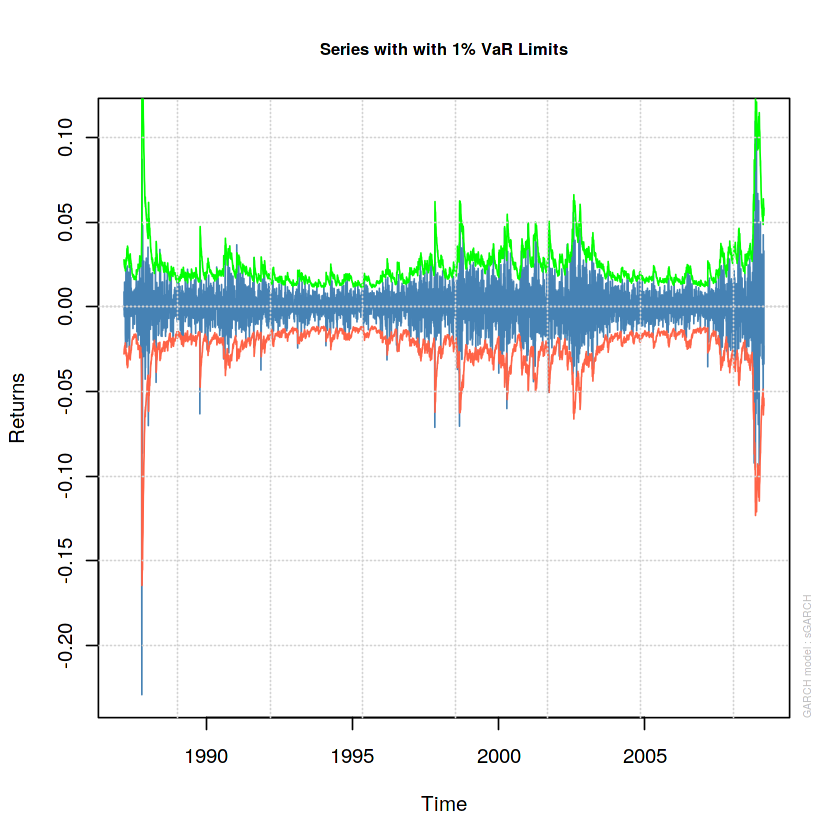

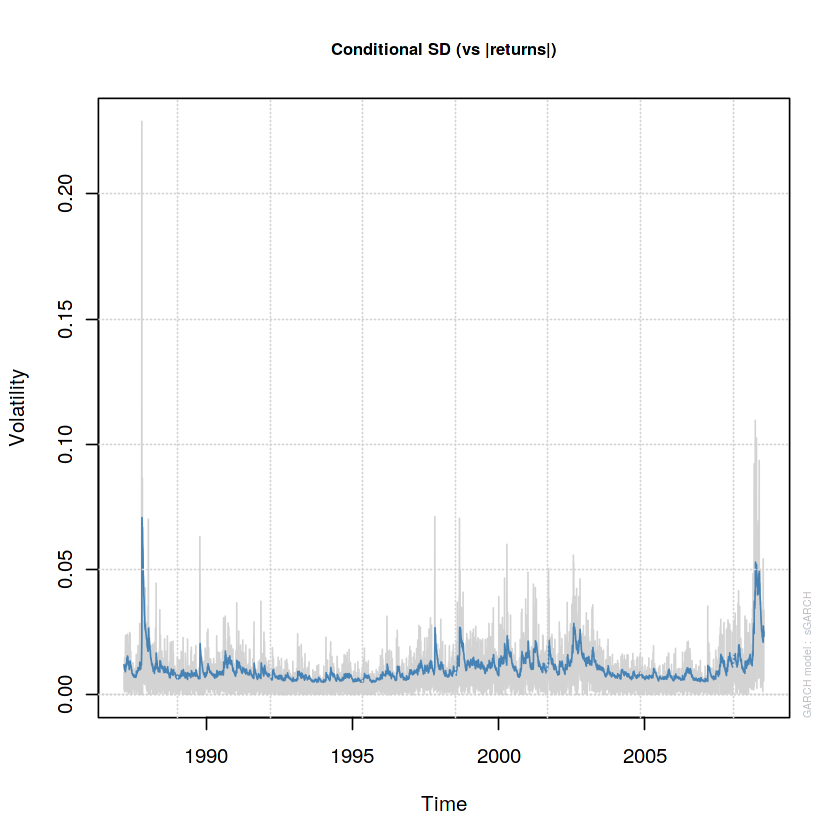

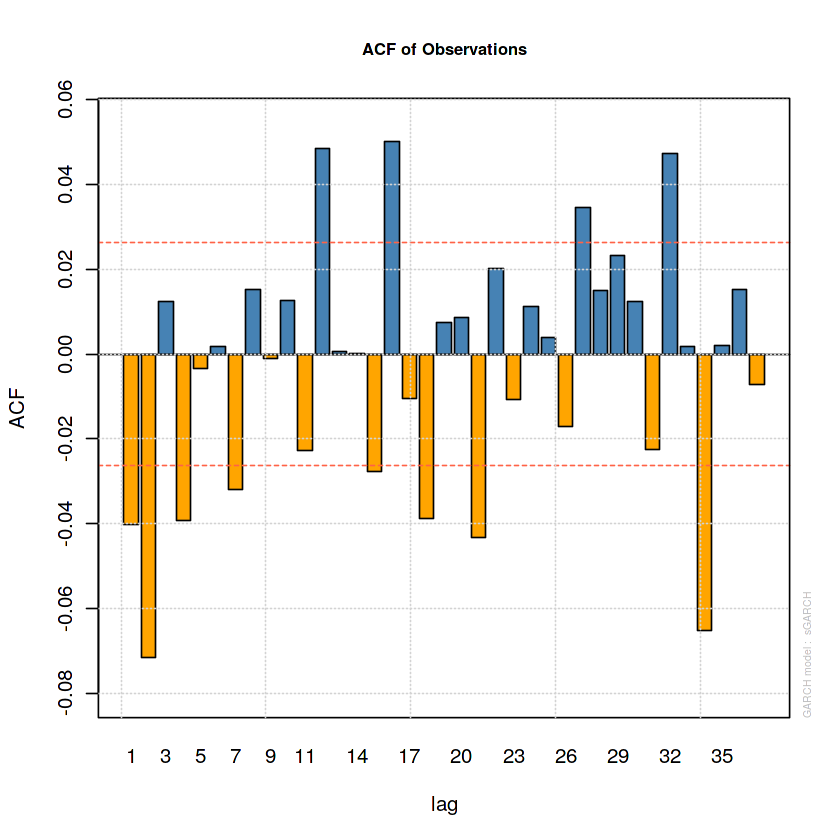

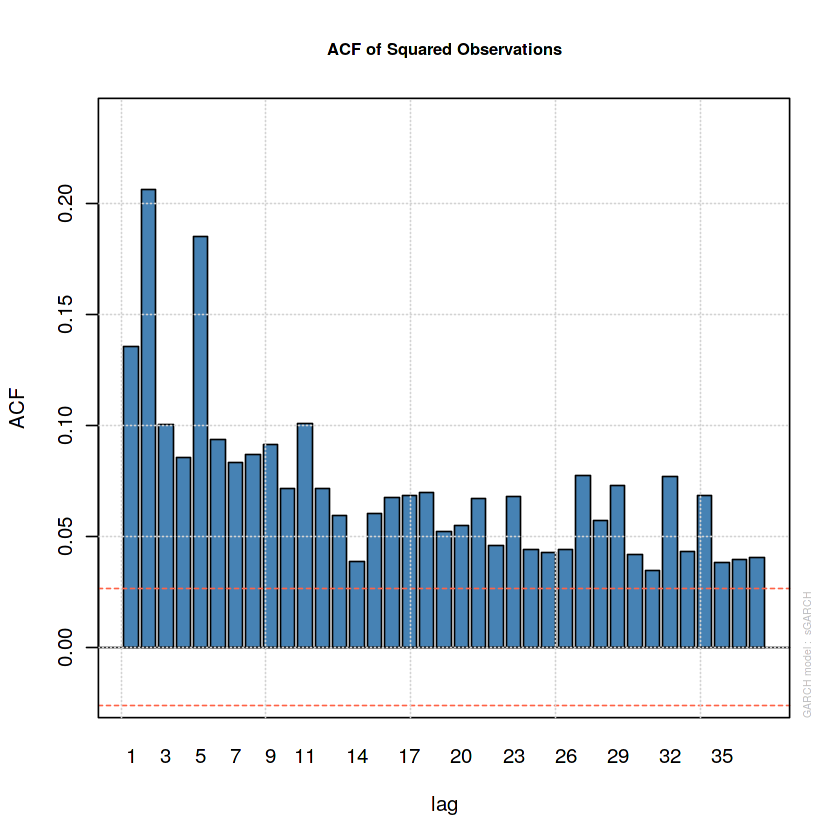

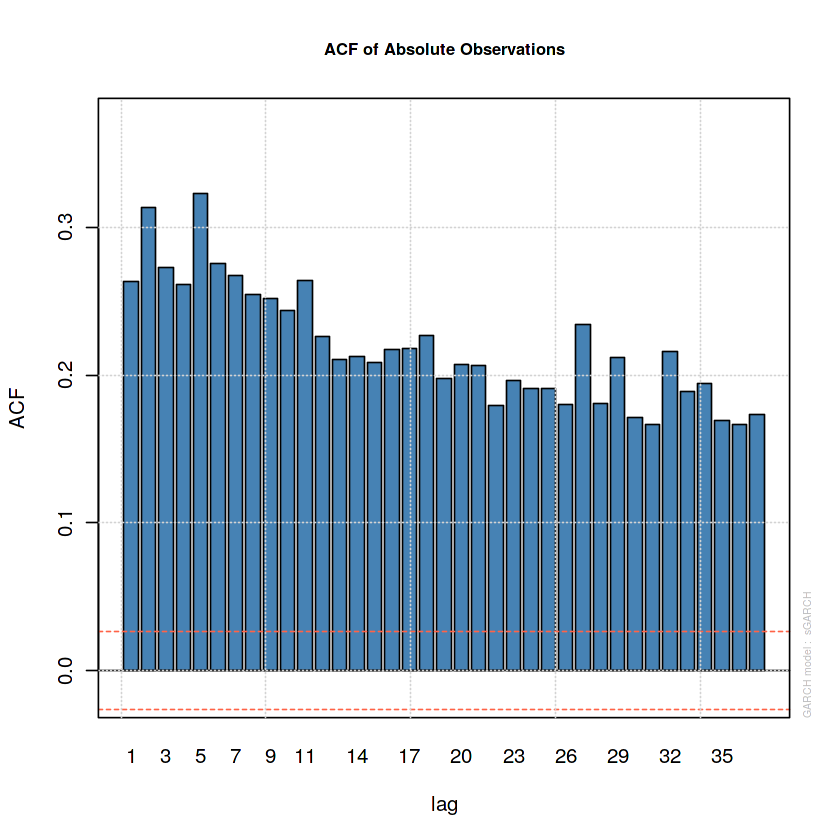

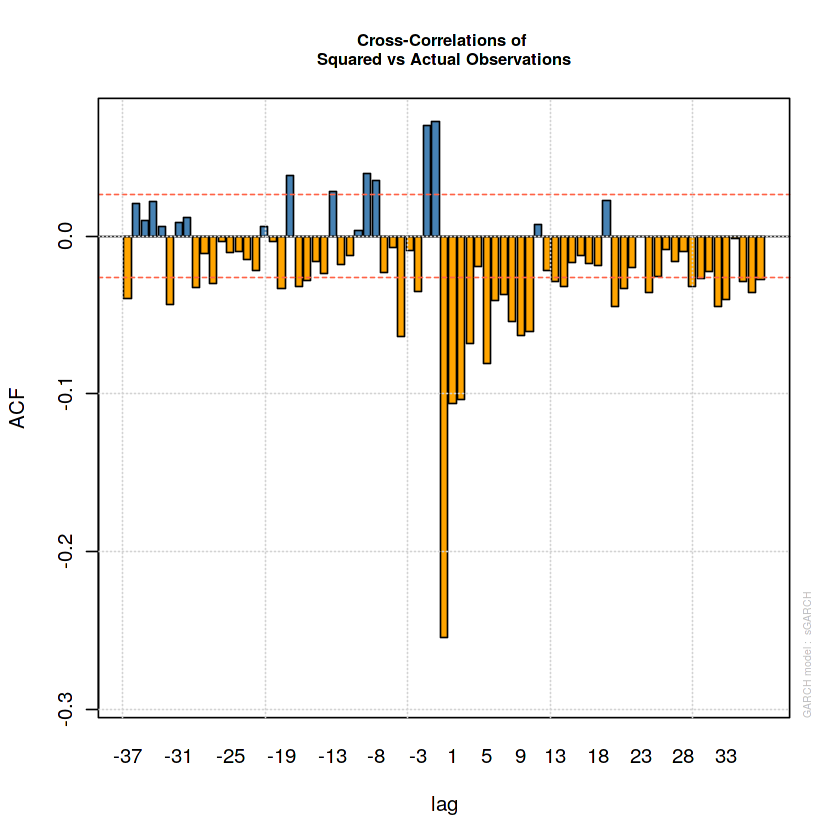

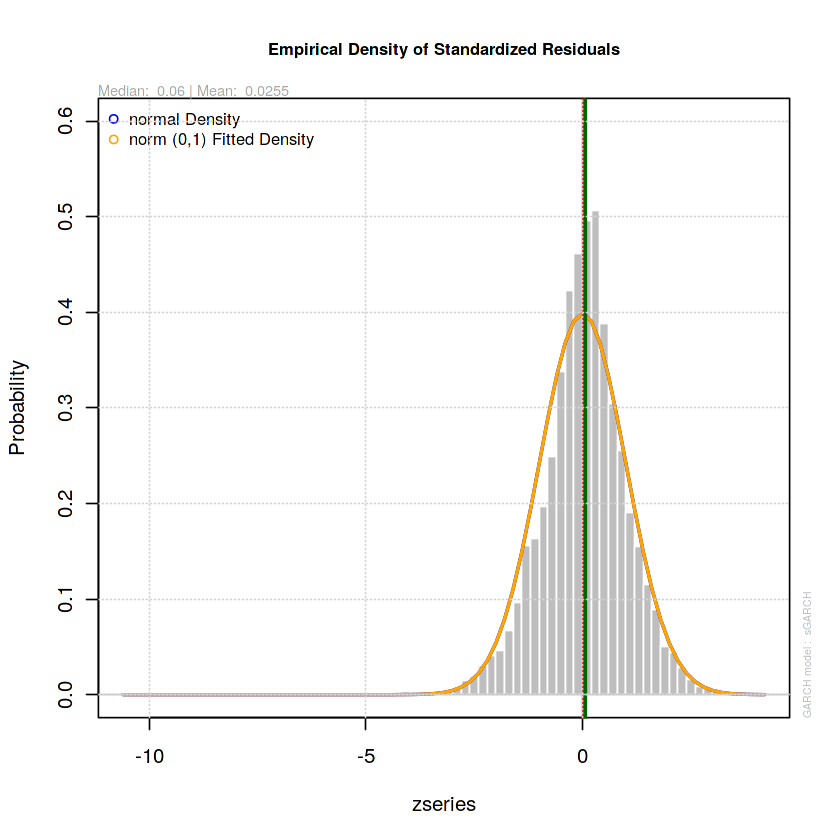

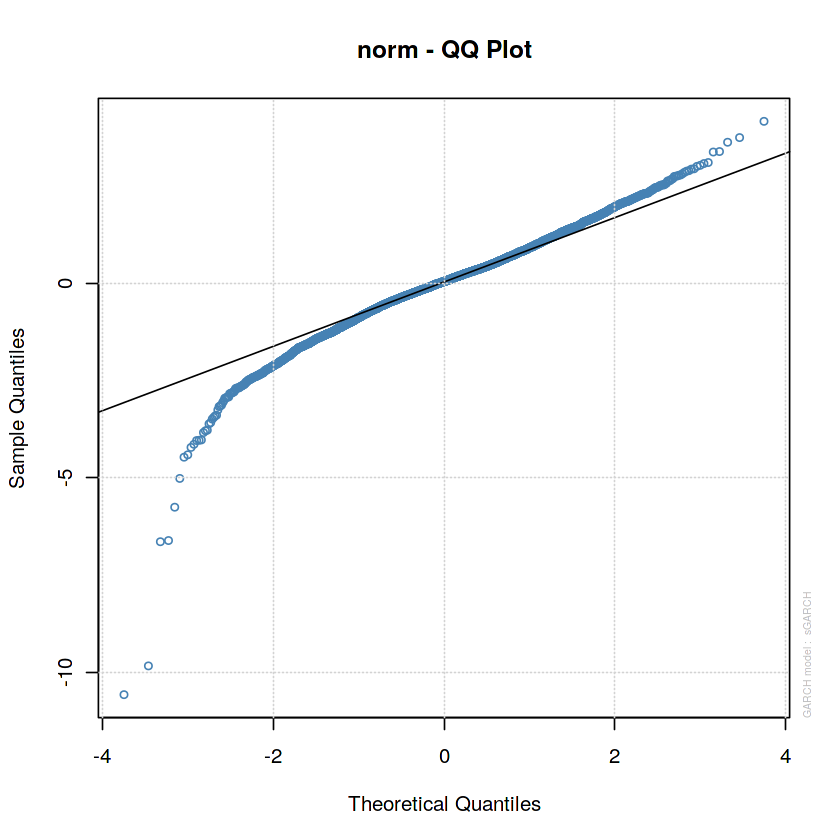

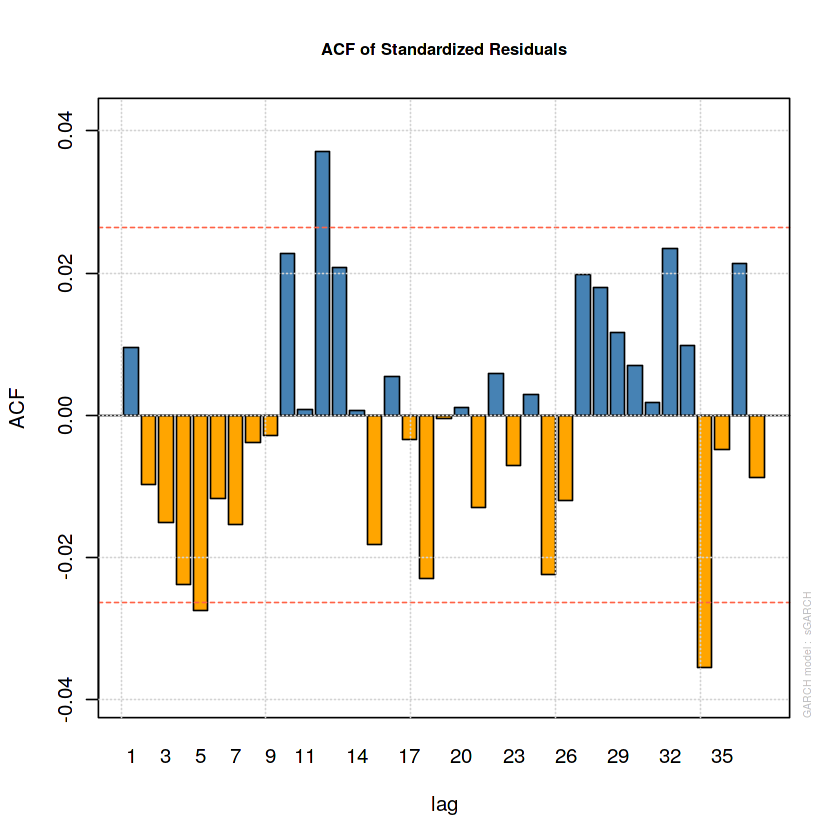

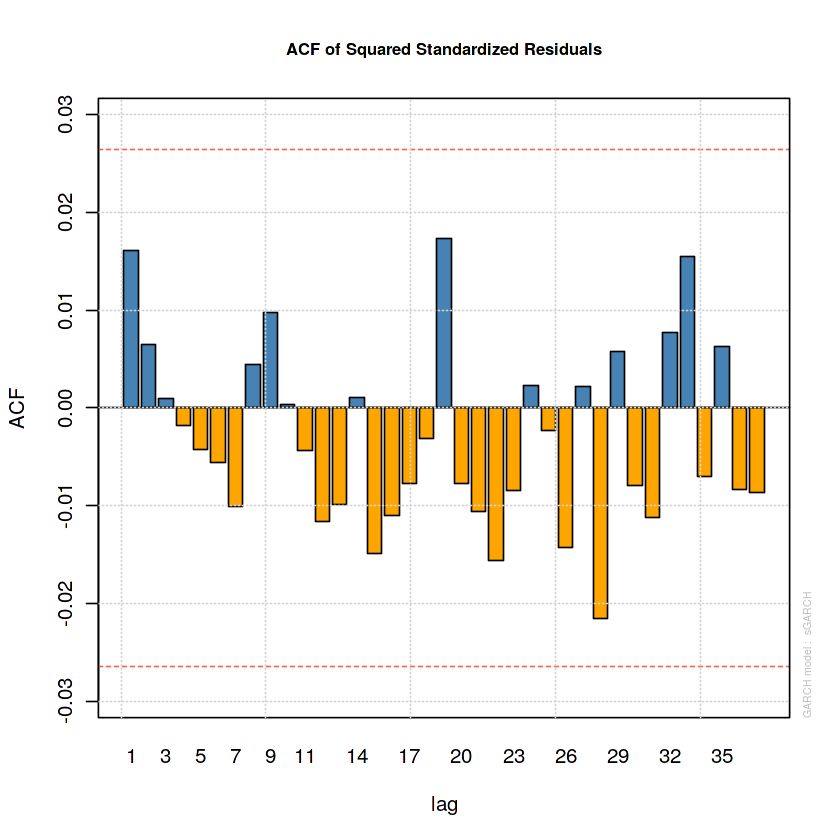

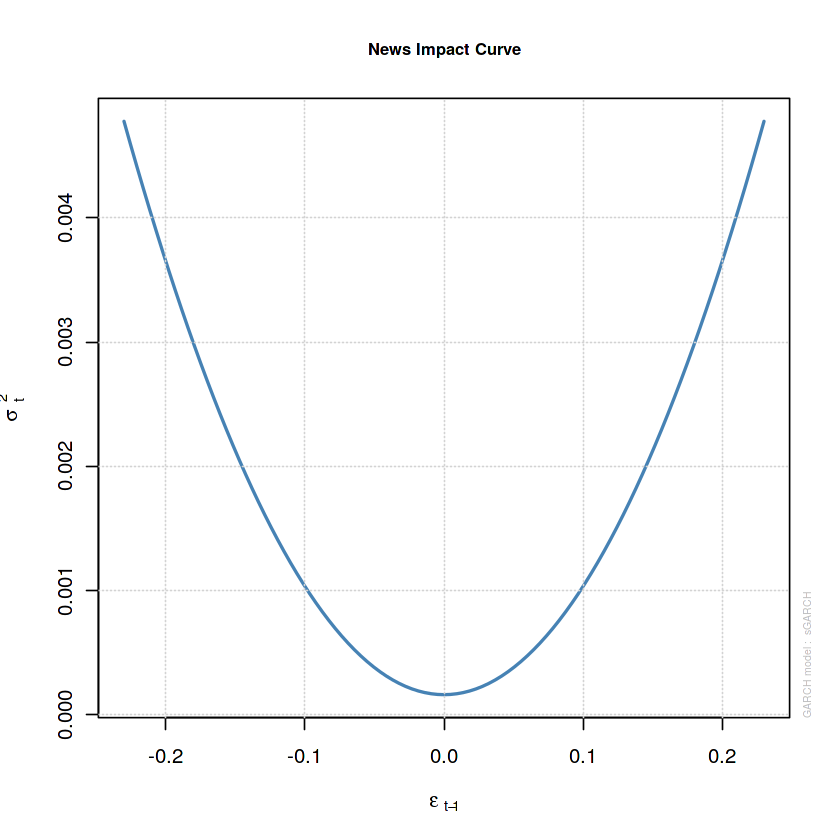

In [8]:
for(i in 1:12) plot(fit, which=i)

In [9]:
ugarchforecast(fit)


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2009-01-30]:
     Series   Sigma
T+1       0 0.02484
T+2       0 0.02477
T+3       0 0.02470
T+4       0 0.02464
T+5       0 0.02457
T+6       0 0.02450
T+7       0 0.02444
T+8       0 0.02437
T+9       0 0.02430
T+10      0 0.02424



In [10]:
## Semi-parmetric bootstrap
## Use real residuals as innovations in fitted models for prediction
ugarchboot(fit, method = "Partial", n.ahead = 120, n.bootpred = 2000)


*-----------------------------------*
*     GARCH Bootstrap Forecast      *
*-----------------------------------*
Model : sGARCH
n.ahead : 120
Bootstrap method:  partial
Date (T[0]): 2009-01-30

Series (summary):
          min      q.25      mean     q.75      max forecast[analytic]
t+1  -0.10938 -0.012945  0.000350 0.015120 0.084373                  0
t+2  -0.23499 -0.012235  0.001265 0.015688 0.104372                  0
t+3  -0.13793 -0.012030  0.000997 0.014793 0.084335                  0
t+4  -0.28592 -0.012569 -0.000019 0.014241 0.106998                  0
t+5  -0.23314 -0.011759  0.000988 0.015378 0.091071                  0
t+6  -0.17330 -0.012091  0.000829 0.014333 0.101295                  0
t+7  -0.25955 -0.012153  0.001098 0.015178 0.093404                  0
t+8  -0.12572 -0.011243  0.000843 0.014576 0.133953                  0
t+9  -0.25732 -0.011121  0.000956 0.014765 0.181544                  0
t+10 -0.17411 -0.012788  0.000817 0.015329 0.116416                  0
.....

In [11]:
## Classical bootstrap
ugarchboot(fit, method="full", n.ahead=12, n.bootpred=4)


*-----------------------------------*
*     GARCH Bootstrap Forecast      *
*-----------------------------------*
Model : sGARCH
n.ahead : 12
Bootstrap method:  full
Date (T[0]): 2009-01-30

Series (summary):
           min      q.25      mean      q.75      max forecast[analytic]
t+1  -0.034788 -0.019779 -0.007578  0.004753 0.018240                  0
t+2  -0.027859  0.004364  0.015669  0.032595 0.048721                  0
t+3  -0.012471 -0.009414 -0.002738  0.002845 0.008608                  0
t+4  -0.021816 -0.003205 -0.001703  0.003877 0.009882                  0
t+5  -0.036644 -0.032851 -0.018895 -0.006850 0.000955                  0
t+6  -0.153057 -0.029314 -0.028136  0.009385 0.021566                  0
t+7  -0.055877 -0.035340 -0.010196  0.017810 0.025931                  0
t+8  -0.033696 -0.015396 -0.004504  0.004120 0.029689                  0
t+9  -0.033729 -0.002604  0.009158  0.027123 0.043695                  0
t+10 -0.030909 -0.009735  0.001391  0.017933 0.025523       

In [ ]:
## MC estimation of sampling distribution 
## ?ugarchdistribution

## Stochastic Volatility

Variant of GARCH model -- Stochastic Volatility

IME, more common in Bayesian literature than classical, but no real reason why...

Missing the "feedback" element of GARCH models:

$$\log \sigma_t^2 \sim \text{Ornstein-Uhlenbeck}$$

Loading required package: coda
Warning message in svsample(sp500ret):
“Argument 'y' (data vector) contains zeros. I am adding an offset constant of size 1.19435428917499e-06 to do the auxiliary mixture sampling. If you want to avoid this, you might consider de-meaning the returns before calling this function.”

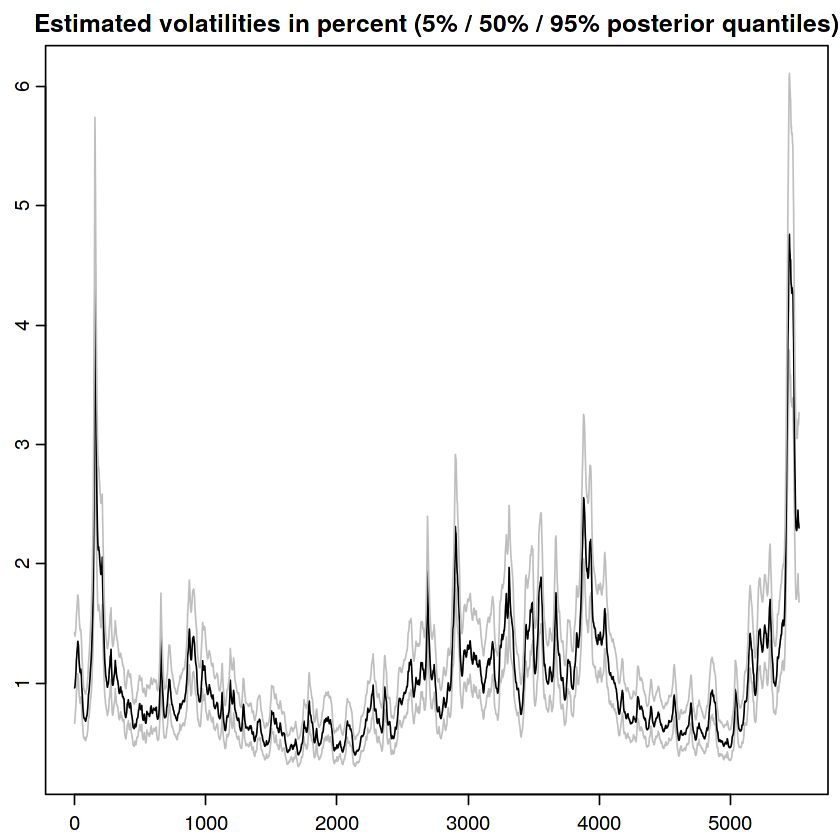

In [12]:
library(stochvol)
svfit <- svsample(sp500ret)
volplot(svfit)

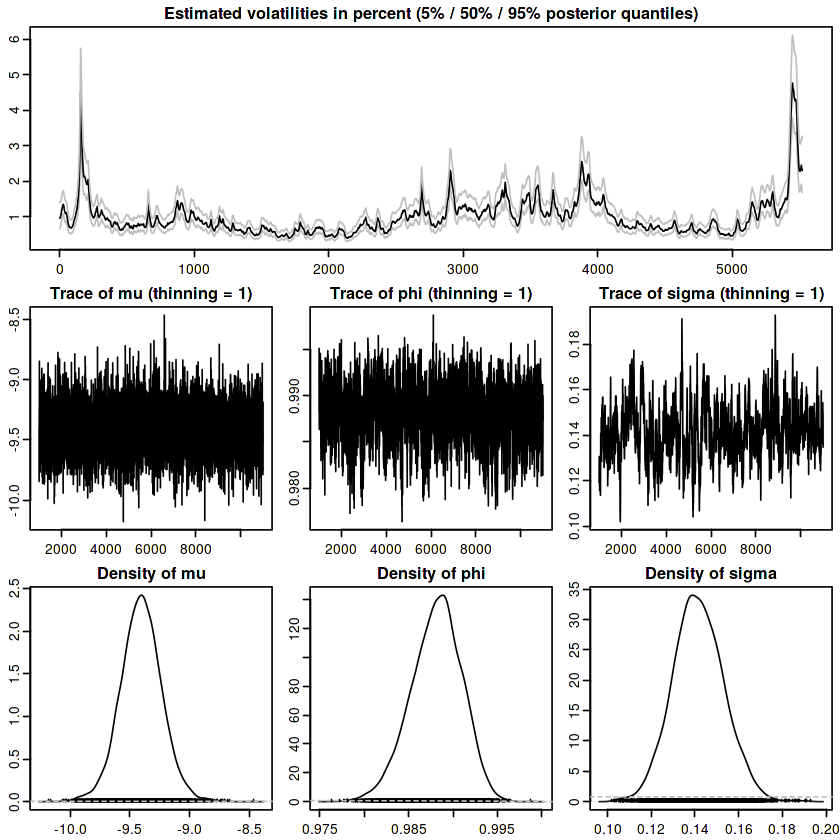

In [13]:
plot(svfit)

In [14]:
## Comparison with GARCH
str(svfit)

List of 9
 $ para    : mcmc [1:10000, 1:3] -9.45 -9.4 -9.62 -9.85 -9.53 ...
  ..- attr(*, "mcpar")= num [1:3] 1001 11000 1
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "mu" "phi" "sigma"
 $ latent  : mcmc [1:10000, 1:5523] -9.43 -9.08 -9.11 -8.98 -9.1 ...
  ..- attr(*, "mcpar")= num [1:3] 1001 11000 1
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5523] "h_1" "h_2" "h_3" "h_4" ...
 $ latent0 :Class 'mcmc'  atomic [1:10000] -9.32 -9.03 -9.32 -8.99 -9 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1001 11000 1
 $ tau     : num[0 , 1:10000] 
 $ y       :An ‘xts’ object on 1987-03-10/2009-01-30 containing:
  Data: num [1:5523, 1] 0.00884 -0.00189 0.00313 -0.00458 -0.00574 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "SP500RET"
  Indexed by objects of class: [POSIXct,POSIXt] TZ: 
  xts Attributes:  
 NULL
 $ priors  :List of 3
  ..$ mu   : num [1:2] 0 100
  ..$ phi  : num [1:2] 5 1.5
  ..$ sigma: num 1
 $ runtime :Class 'proc_tim

In [15]:
head(svfit$summary$latent)

,mean,sd,5%,50%,95%,mean(exp(h_t/2)),sd(exp(h_t/2))
h_1,-9.282397,0.4650997,-10.033181,-9.293215,-8.507988,0.009912215,0.002359731
h_2,-9.283741,0.4531449,-10.022359,-9.290807,-8.530631,0.009891712,0.002291070
h_3,-9.272747,0.4386274,-9.981329,-9.277760,-8.545644,0.009930410,0.002229083
h_4,-9.253721,0.4244571,-9.932491,-9.264545,-8.544142,0.010010383,0.002179869
h_5,-9.225779,0.4095613,-9.884725,-9.235187,-8.536075,0.010135352,0.002128433
h_6,-9.193040,0.3961576,-9.823612,-9.203090,-8.517921,0.010288877,0.002092553


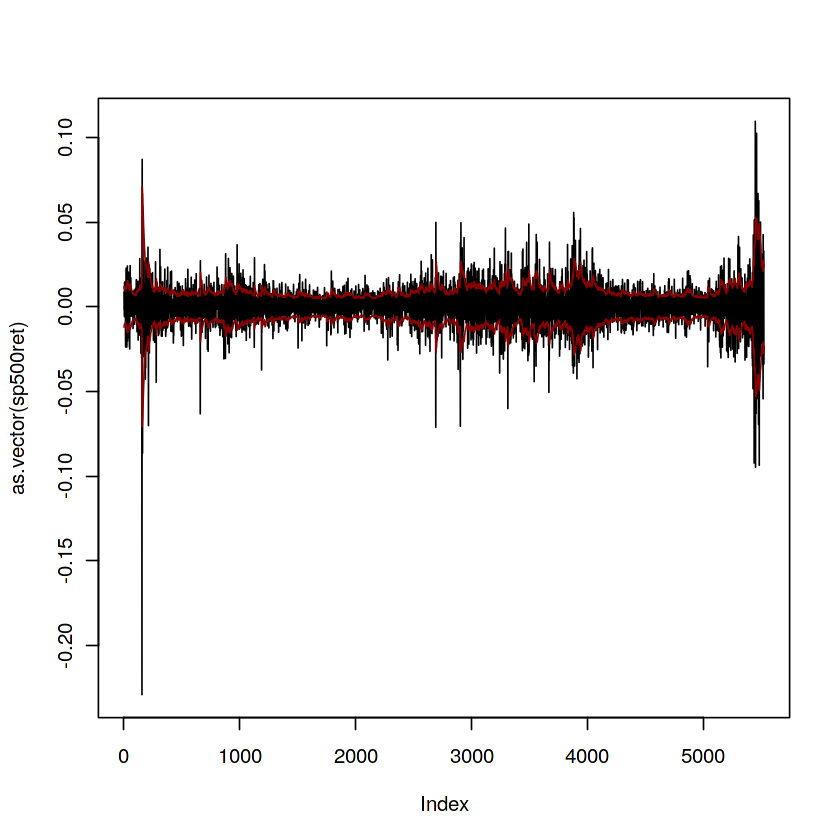

In [25]:
garch_vol <- coredata(sigma(fit))

plot(as.vector(sp500ret), type="l"); 
lines(garch_vol, col="red4")
lines(-1 * garch_vol, col="red4")

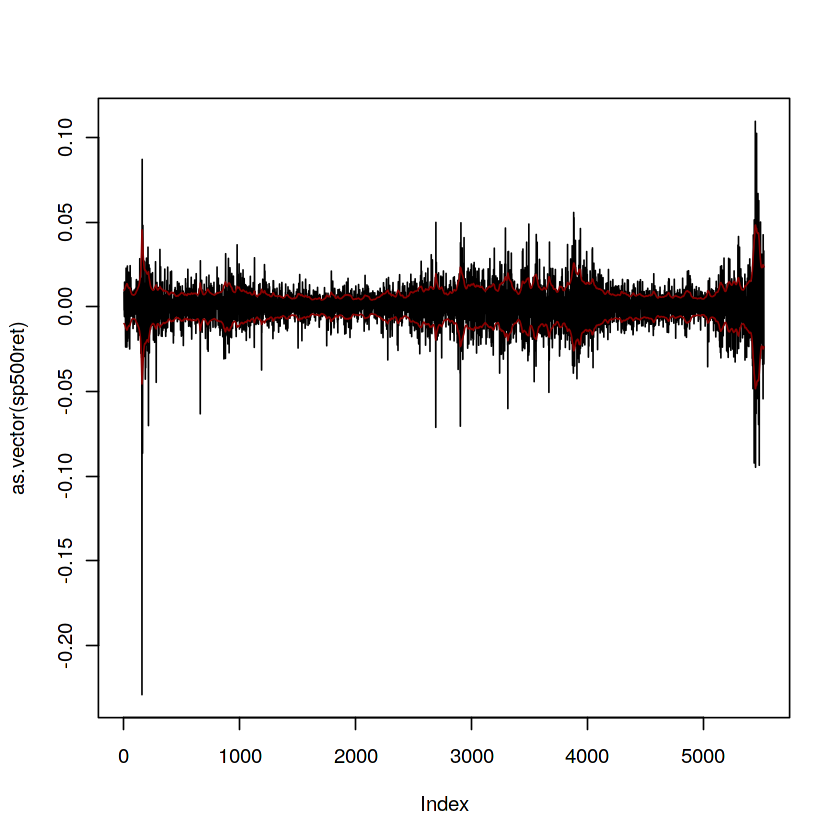

In [26]:
sv_vol <- svfit$summary$latent[,6]

plot(as.vector(sp500ret), type="l"); 
lines(sv_vol, col="red4")
lines(-1 * sv_vol, col="red4")

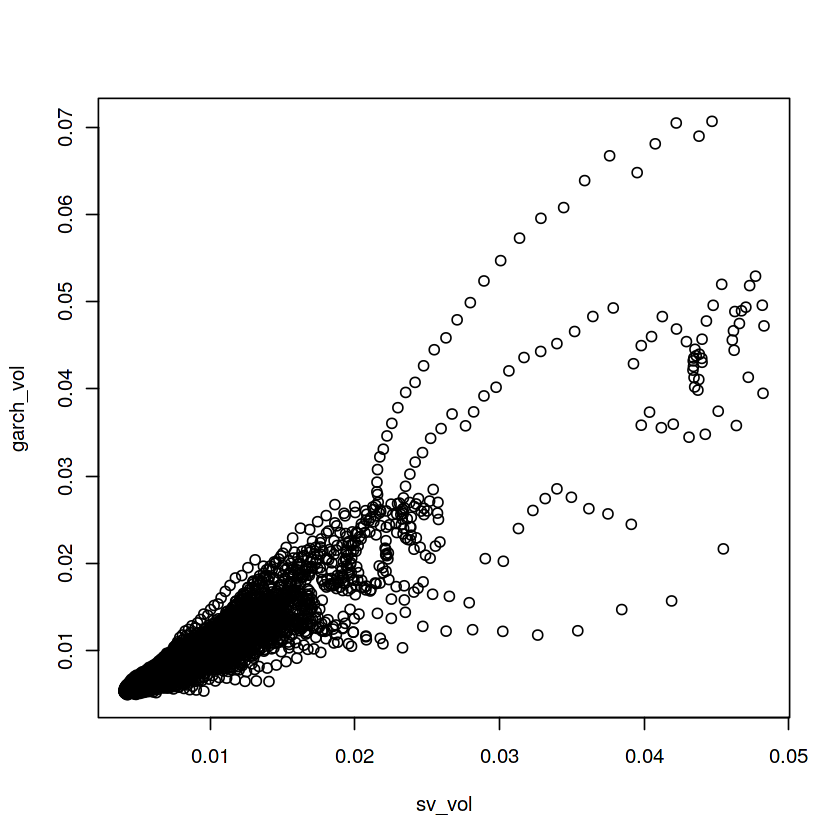

In [27]:
plot(sv_vol, garch_vol)